In [2]:
from Project4.verification_net import VerificationNet
from Project4.stacked_mnist import StackedMNISTData, DataMode
from gen_autoencoder_routine import Generative_AE_Routine
import torch

In [3]:
torch.manual_seed(1)
""" GENERATIVE AUTOENCODER ROUTINE"""
batch_size = 16
data_object = StackedMNISTData(mode=DataMode.MONO_FLOAT_COMPLETE, default_batch_size=batch_size)
#instantiate verification network
net = VerificationNet(force_learn=False)
net.train(generator=data_object, epochs=5) # gen=data_object, makes sure we test on the same type of data as the model was trained on
verification_tolerance = 0.8 if data_object.channels == 1 else 0.5

autoencoder_learning_rate = 0.0002
autoencoder_loss_function = 'MSE' #'binary_cross_entropy'  # AVAILABLE 'binary_cross_entropy'
autoencoder_optimizer = 'SGD'#  # AVAILABLE 'SGD' # #'adam'#
autoencoder_epochs = 5  # Optimal for MNIST: 3

num_samples = 200
latent_vector_size = 64  # recommended for MNIST between 16 and 64
gen_name ='3_conv_layers_lvs:_64_filters:16_lldim:32,4,4_epochs:5'
gen_ae_save_path = f'checkpoints/gen_AE/{gen_name}'
gen_autoencoder = Generative_AE_Routine(
    data_object,
    autoencoder_learning_rate,
    autoencoder_loss_function,
    autoencoder_optimizer,
    autoencoder_epochs,

    latent_vector_size,
    batch_size,
    num_samples,
    gen_ae_save_path
)

Autoencoder(
  (encoder): Encoder(
    (model): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
      (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
      (7): Linear(in_features=512, out_features=64, bias=True)
    )
  )
  (decoder): Decoder(
    (model): Sequential(
      (0): Linear(in_features=64, out_features=512, bias=True)
      (1): Unflatten(dim=1, unflattened_size=(32, 4, 4))
      (2): ConvTranspose2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
      (4): ConvTranspose2d(16, 1, kernel_size=(3, 3), 


GENERATIVE AUTOENCODER TRAINING

Epoch: 0, Iteration: 1875, Validation loss: 1.4007, Validation accuracy N/A
Epoch: 0, Iteration: 3750, Validation loss: 1.3791, Validation accuracy N/A
Epoch: 1, Iteration: 5625, Validation loss: 1.3693, Validation accuracy N/A
Epoch: 1, Iteration: 7500, Validation loss: 1.3665, Validation accuracy N/A
Epoch: 2, Iteration: 9375, Validation loss: 1.3658, Validation accuracy N/A
Epoch: 2, Iteration: 11250, Validation loss: 1.3656, Validation accuracy N/A
Epoch: 3, Iteration: 13125, Validation loss: 1.3656, Validation accuracy N/A
Epoch: 3, Iteration: 15000, Validation loss: 1.3656, Validation accuracy N/A
Epoch: 4, Iteration: 16875, Validation loss: 1.3655, Validation accuracy N/A
Epoch: 4, Iteration: 18750, Validation loss: 1.3655, Validation accuracy N/A


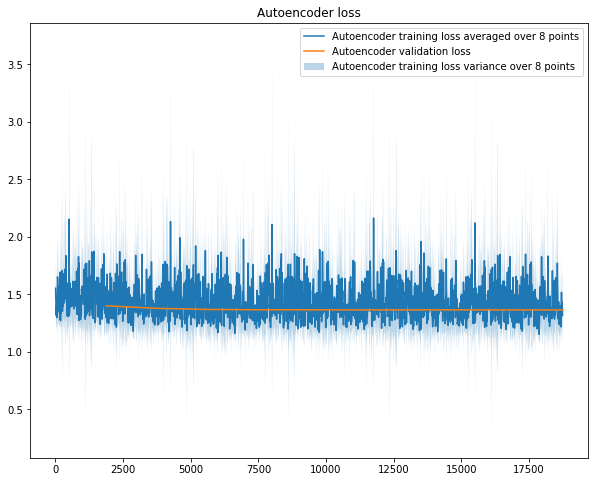

In [4]:
"""OPTIONAL TRAINING"""
gen_autoencoder.train_autoencoder()

In [6]:
"""TESTING WITH SPECIFIED MODEL"""
model_name = '3_conv_layers_lvs:_64_filters:16_lldim:32,4,4_epochs:5'
test_model_path = f'checkpoints/gen_AE/{model_name}'

images, reconstructions, labels = gen_autoencoder.reconstruct_test_data(load_model_path=test_model_path)
#Check quality of reconstructions
gen_autoencoder.check_autoencoder_performance(net, verification_tolerance, reconstructions, labels, load_model_path=test_model_path)

#Generate samples
generated_images = gen_autoencoder.generate_samples(load_model_path=test_model_path)

#check quality of generated images
gen_autoencoder.check_autoencoder_performance(net, verification_tolerance, generated_images, load_model_path=test_model_path)

Loaded model from checkpoints/gen_AE/3_conv_layers_lvs:_64_filters:16_lldim:32,4,4_epochs:5


TypeError: show_images_and_reconstructions() got multiple values for argument 'title'